Virve Rajasärkkä   
Ennakoivat analytiikkamenetelmät, HAMK   
syksy 2023

Aineisto: https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [3]:
# luetaan data csv-tiedostosta
data = pd.read_csv('fake_bills.csv', delimiter = ";", engine = "python")

In [4]:
data['is_genuine'] = data['is_genuine'].astype(int)

In [5]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
data['is_genuine'].value_counts()

is_genuine
1    1000
0     500
Name: count, dtype: int64

In [7]:
# etsitään puuttuvat arvot
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
# täytetään puuttuvat arvot keskiarvolla
data['margin_low'] = data['margin_low'].fillna(data.margin_low.mean())
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<Axes: >

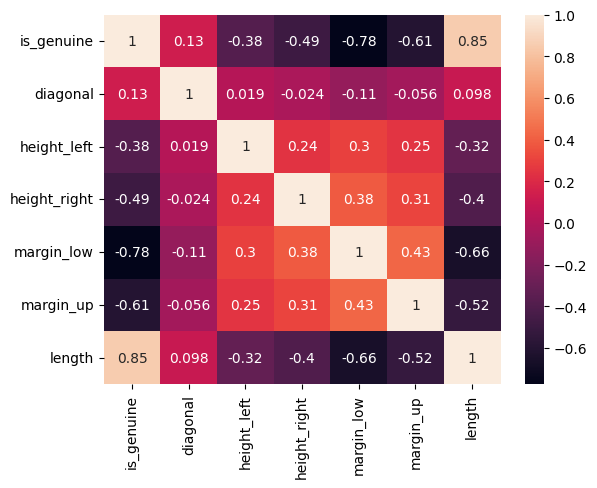

In [9]:
data.corr()['is_genuine'].sort_values()
sns.heatmap(data.corr(), annot = True)

In [10]:
X = data.drop('is_genuine', axis = 1)
y = data['is_genuine']

In [11]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [12]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int32

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# jaetaan aineisto opetus- ja testiosiin
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [38]:
y_pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9888888888888889

In [40]:
# k-fold
from sklearn.model_selection import KFold
n_splits = 2
k = 9
kf = KFold(n_splits = n_splits, shuffle = True) 
summa = 0

for train_idx, test_idx in  kf.split(X): ## Loop over the splits
    x_train = X.iloc[train_idx, :] ## fetch the values
    x_test = X.iloc[test_idx, :]

    y_train = y.iloc[train_idx] ## fetch the values
    y_test = y.iloc[test_idx]

    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

print(summa/n_splits)

0.9893333333333334
